# ADEGuard Project - Step 3: Enhanced Weak Supervision (Python 3.11.8)
## Goal: Generate comprehensive weak labels using multiple automated methods
## Compatible with Python 3.11.8

In [2]:
# Install required packages for Python 3.11.8
!pip install --upgrade pip
!pip install spacy>=3.7.0
!pip install scispacy>=0.5.4
!pip install pandas>=2.0.0 numpy>=1.24.0
!pip install matplotlib>=3.7.0 seaborn>=0.12.0
!pip install nltk>=3.8.0
!pip install regex>=2023.0.0
!pip install transformers>=4.30.0 torch>=2.0.0
!pip install tqdm>=4.65.0

# Install spaCy models
!python -m spacy download en_core_web_sm

# Install scientific models (compatible with Python 3.11)
try:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
except:
    print("Scientific models installation failed - will use fallback")

print("✓ Package installation completed")

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.6.2 requires numpy<2.0, but you have numpy 2.3.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 201.8 kB/s eta 0:01:04
     --------------------------------------- 0.1/12.8 MB 203.4 kB/s eta 0:01:03
     --------------------------------------- 0.2/12.8 MB 278.4 kB/s eta 0:00:46
     -----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz (14.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached spacy-3.7.5-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached blis-0.7.11-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
Using cached spacy-3.7.5-cp311-cp311-win_amd64.whl (12.1 MB)
Using cached thinc-8.2.5-cp311-cp311-win_amd64.whl (1.5 MB)
Using cached blis-0.7.11-cp311-cp311-win_amd64.whl (6.6 MB)
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.4-py3-none-any.whl size=14778539 sha256=c11bf70e371de43df0a9689abdd0e86dcf4a01830717db6e6f5093


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz (119.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787728 sha256=a2575738d67575e164e20e7176f284e0f2569757e985a892914eba21dff9d6d1
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\6e\a6\d6\bd15a41e2ff02a62f0a0a48dddbc07d048307db7199a1538f7
Successfully built en_ner_bc5cdr_md
✓ Package installation completed



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries with Python 3.11.8 compatibility
import sys
import pandas as pd
import numpy as np
import json
import re
from pathlib import Path
from collections import defaultdict, Counter
from typing import List, Dict, Any, Optional, Union
import warnings
from datetime import datetime
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Suppress warnings
warnings.filterwarnings('ignore')

# Try to import spaCy models
try:
    import spacy
    nlp_general = spacy.load("en_core_web_sm")
    logger.info("✓ General English model loaded")
except Exception as e:
    logger.error(f"Failed to load general model: {e}")
    nlp_general = None

try:
    import scispacy
    nlp_sci = spacy.load("en_core_sci_sm")
    logger.info("✓ Scientific model loaded")
except Exception as e:
    logger.warning(f"Scientific model not available: {e}")
    nlp_sci = nlp_general

try:
    nlp_ner = spacy.load("en_ner_bc5cdr_md")
    logger.info("✓ Biomedical NER model loaded")
except Exception as e:
    logger.warning(f"Biomedical NER model not available: {e}")
    nlp_ner = None

# Try to import NLTK
try:
    import nltk
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    from nltk.tokenize import sent_tokenize, word_tokenize
    logger.info("✓ NLTK loaded successfully")
except Exception as e:
    logger.warning(f"NLTK not available: {e}")
    # Fallback tokenization
    def sent_tokenize(text): return text.split('. ')
    def word_tokenize(text): return text.split()

print(f"✓ Setup completed at {datetime.now()}")
print(f"✓ Python version: {sys.version}")
print(f"✓ User: ghanashyam9348")

ERROR:__main__:Failed to load general model: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
INFO:__main__:✓ NLTK loaded successfully


✓ Setup completed at 2025-10-19 03:30:44.744454
✓ Python version: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
✓ User: ghanashyam9348


In [10]:
# Load and prepare data with enhanced error handling
from pathlib import Path
import pandas as pd

class DataLoader:
    """Enhanced data loader for Python 3.11.8 with robust error handling"""
    
    def __init__(self, data_path: str = 'datasets'):
        self.data_path = Path(data_path)
        self.logger = logging.getLogger(self.__class__.__name__)
    
    def load_vaers_data(self) -> pd.DataFrame:
        """Load VAERS data with fallback options"""
        
        # Try to load integrated data first
        integrated_file = self.data_path / 'vaers_integrated.csv'
        if integrated_file.exists():
            try:
                df = pd.read_csv(integrated_file, encoding='utf-8', low_memory=False)
                self.logger.info(f"✓ Loaded integrated data: {df.shape}")
                return df
            except Exception as e:
                self.logger.warning(f"Failed to load integrated data: {e}")
        
        # Fallback: load individual files
        files_to_try = [
            '2025VAERSDATA.csv',
            'VAERSDATA.csv',
            'vaers_data.csv'
        ]
        
        for filename in files_to_try:
            filepath = self.data_path / filename
            if filepath.exists():
                try:
                    # Try different encodings
                    for encoding in ['utf-8', 'latin-1', 'cp1252']:
                        try:
                            df = pd.read_csv(filepath, encoding=encoding, low_memory=False)
                            self.logger.info(f"✓ Loaded {filename}: {df.shape} with {encoding} encoding")
                            return df
                        except UnicodeDecodeError:
                            continue
                except Exception as e:
                    self.logger.warning(f"Failed to load {filename}: {e}")
                    continue
        
        raise FileNotFoundError("No VAERS data files found or readable")
    
    def identify_text_columns(self, df: pd.DataFrame) -> List[str]:
        """Identify potential text columns"""
        text_columns = []
        
        # Check for obvious text column names
        text_indicators = ['SYMPTOM_TEXT', 'NARRATIVE', 'DESCRIPTION', 'TEXT', 'NOTES']
        
        for col in df.columns:
            col_upper = str(col).upper()
            if any(indicator in col_upper for indicator in text_indicators):
                text_columns.append(col)
                self.logger.info(f"Found obvious text column: {col}")
        
        # If no obvious columns, find long string fields
        if not text_columns:
            for col in df.columns:
                if df[col].dtype == 'object':
                    try:
                        avg_length = df[col].astype(str).str.len().mean()
                        if avg_length > 50:  # Likely narrative text
                            text_columns.append(col)
                            self.logger.info(f"Found potential text column: {col} (avg length: {avg_length:.1f})")
                    except Exception:
                        continue
        
        return text_columns
    
    def clean_text(self, text: Any) -> str:
        """Clean and normalize text with type safety"""
        if pd.isna(text) or text is None:
            return ""
        
        text = str(text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Remove special characters but keep medical punctuation
        text = re.sub(r'[^\w\s\-\.\,\(\)\%\/\:]', '', text)
        
        return text.strip()

# Initialize data loader
data_loader = DataLoader()

# Load data
try:
    df = data_loader.load_vaers_data()
    logger.info(f"Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns")
    
    # Identify text columns
    text_columns = data_loader.identify_text_columns(df)
    main_text_column = text_columns[0] if text_columns else None
    
    if main_text_column:
        logger.info(f"Using main text column: {main_text_column}")
        
        # Clean text data
        df['clean_text'] = df[main_text_column].apply(data_loader.clean_text)
        
        # Filter meaningful text
        df_clean = df[df['clean_text'].str.len() > 20].copy()
        logger.info(f"After cleaning: {len(df_clean)} records with meaningful text")
        
        # Create working sample
        sample_size = min(5000, len(df_clean))  # Increased for Python 3.11.8 performance
        df_sample = df_clean.sample(n=sample_size, random_state=42)
        logger.info(f"Working sample: {len(df_sample)} records")
        
    else:
        raise ValueError("No suitable text columns found")
        
except Exception as e:
    logger.error(f"Data loading failed: {e}")
    # Create sample data for testing
    sample_data = {
        'VAERS_ID': [1, 2, 3],
        'clean_text': [
            'Patient experienced severe headache and nausea after COVID-19 vaccine',
            'Mild injection site pain and redness following Pfizer vaccination',
            'Hospitalized due to allergic reaction, received epinephrine treatment'
        ],
        'AGE_YRS': [45, 23, 67],
        'SEX': ['F', 'M', 'F'],
        'VAX_TYPE': ['COVID19', 'COVID19', 'COVID19'],
        'VAX_MANU': ['MODERNA', 'PFIZER', 'PFIZER']
    }
    df_sample = pd.DataFrame(sample_data)
    main_text_column = 'clean_text'
    logger.warning("Using sample data for demonstration")

print(f"✓ Data preparation completed - Sample size: {len(df_sample)}")

INFO:DataLoader:✓ Loaded integrated data: (38287, 55)
INFO:__main__:Dataset loaded: 38287 records, 55 columns
INFO:DataLoader:Found obvious text column: SYMPTOM_TEXT
INFO:__main__:Using main text column: SYMPTOM_TEXT
INFO:__main__:After cleaning: 37735 records with meaningful text
INFO:__main__:Working sample: 5000 records


✓ Data preparation completed - Sample size: 5000


In [7]:
# Enhanced medical dictionaries with Python 3.11.8 features
from typing import Dict, List, Set, Union
from dataclasses import dataclass
from enum import Enum

class EntityType(Enum):
    """Entity types for medical annotations"""
    ADE = "ADE"
    DRUG = "DRUG"
    MODIFIER = "MODIFIER"
    SEVERITY = "SEVERITY"

@dataclass
class MedicalTerm:
    """Data class for medical terms with metadata"""
    term: str
    category: str
    confidence: float = 1.0
    synonyms: List[str] = None
    
    def __post_init__(self):
        if self.synonyms is None:
            self.synonyms = []

class EnhancedMedicalDictionaries:
    """Enhanced medical dictionaries with Python 3.11.8 features"""
    
    def __init__(self):
        self.logger = logging.getLogger(self.__class__.__name__)
        self._create_dictionaries()
        self.logger.info("✓ Enhanced medical dictionaries initialized")
    
    def _create_dictionaries(self) -> None:
        """Create comprehensive medical dictionaries using modern Python features"""
        
        # ADE/Symptom terms with categorization
        self.ade_terms: Dict[str, List[MedicalTerm]] = {
            'pain_related': [
                MedicalTerm('pain', 'general_pain', 0.9),
                MedicalTerm('ache', 'general_pain', 0.8),
                MedicalTerm('discomfort', 'mild_pain', 0.7),
                MedicalTerm('soreness', 'mild_pain', 0.8),
                MedicalTerm('tenderness', 'mild_pain', 0.7),
                MedicalTerm('burning', 'specific_pain', 0.8),
                MedicalTerm('stabbing', 'specific_pain', 0.8),
                MedicalTerm('throbbing', 'specific_pain', 0.8)
            ],
            'skin_reactions': [
                MedicalTerm('rash', 'dermatological', 0.9, ['skin rash', 'dermatitis']),
                MedicalTerm('hives', 'allergic_skin', 0.9, ['urticaria']),
                MedicalTerm('urticaria', 'allergic_skin', 0.9),
                MedicalTerm('erythema', 'skin_discoloration', 0.8, ['redness']),
                MedicalTerm('swelling', 'inflammation', 0.9, ['edema']),
                MedicalTerm('edema', 'inflammation', 0.8),
                MedicalTerm('bruising', 'skin_injury', 0.7, ['contusion']),
                MedicalTerm('itching', 'skin_sensation', 0.8, ['pruritus']),
                MedicalTerm('blister', 'skin_injury', 0.8, ['bulla']),
                MedicalTerm('peeling skin', 'dermatological', 0.7, ['desquamation'])
            ],
            'neurological': [
                MedicalTerm('headache', 'neurological', 0.9, ['cephalgia']),
                MedicalTerm('dizziness', 'neurological', 0.8, ['vertigo']),
                MedicalTerm('fatigue', 'systemic', 0.8, ['tiredness', 'exhaustion']),
                MedicalTerm('weakness', 'neurological', 0.8, ['asthenia']),
                MedicalTerm('numbness', 'neurological', 0.8),
                MedicalTerm('tingling', 'neurological', 0.8, ['paresthesia']),
                MedicalTerm('confusion', 'cognitive', 0.7),
                MedicalTerm('seizure', 'severe_neurological', 0.9, ['convulsion']),
                MedicalTerm('migraine', 'severe_neurological', 0.9),
                MedicalTerm('tremor', 'neurological', 0.8, ['shaking'])
            ],
            'gastrointestinal': [
                MedicalTerm('nausea', 'gi', 0.9),
                MedicalTerm('vomiting', 'gi', 0.9, ['emesis']),
                MedicalTerm('diarrhea', 'gi', 0.9, ['loose stools']),
                MedicalTerm('constipation', 'gi', 0.8),
                MedicalTerm('abdominal pain', 'gi', 0.9, ['stomach pain']),
                MedicalTerm('cramping', 'gi', 0.7, ['cramps']),
                MedicalTerm('indigestion', 'gi', 0.6, ['dyspepsia', 'upset stomach']),
                MedicalTerm('heartburn', 'gi', 0.7, ['acid reflux']),
                MedicalTerm('loss of appetite', 'gi', 0.7, ['anorexia'])
            ],
            'respiratory': [
                MedicalTerm('shortness of breath', 'respiratory', 0.9, ['dyspnea', 'difficulty breathing']),
                MedicalTerm('cough', 'respiratory', 0.8),
                MedicalTerm('wheezing', 'respiratory', 0.8),
                MedicalTerm('chest tightness', 'respiratory', 0.8),
                MedicalTerm('sore throat', 'respiratory', 0.7),
                MedicalTerm('nasal congestion', 'respiratory', 0.7, ['stuffy nose'])
            ],
            'cardiovascular': [
                MedicalTerm('palpitations', 'cardiac', 0.8, ['heart palpitations']),
                MedicalTerm('chest pain', 'cardiac', 0.9),
                MedicalTerm('hypertension', 'cardiac', 0.8, ['high blood pressure']),
                MedicalTerm('hypotension', 'cardiac', 0.8, ['low blood pressure']),
                MedicalTerm('tachycardia', 'cardiac', 0.8, ['rapid heart rate']),
                MedicalTerm('bradycardia', 'cardiac', 0.8, ['slow heart rate']),
                MedicalTerm('arrhythmia', 'cardiac', 0.8, ['irregular heartbeat'])
            ],
            'systemic': [
                MedicalTerm('fever', 'systemic', 0.9, ['pyrexia', 'elevated temperature']),
                MedicalTerm('chills', 'systemic', 0.8, ['shivering']),
                MedicalTerm('malaise', 'systemic', 0.7, ['general discomfort']),
                MedicalTerm('anaphylaxis', 'severe_allergic', 0.9, ['anaphylactic reaction']),
                MedicalTerm('allergic reaction', 'allergic', 0.9),
                MedicalTerm('dehydration', 'systemic', 0.8),
                MedicalTerm('weight loss', 'systemic', 0.7),
                MedicalTerm('weight gain', 'systemic', 0.7)
            ],
            'serious_events': [
                MedicalTerm('hospitalization', 'serious', 0.9, ['hospitalized', 'hospital admission']),
                MedicalTerm('death', 'fatal', 1.0, ['died', 'fatal', 'mortality']),
                MedicalTerm('disability', 'serious', 0.9, ['disabled', 'impairment']),
                MedicalTerm('cardiac arrest', 'life_threatening', 0.9),
                MedicalTerm('stroke', 'life_threatening', 0.9, ['cerebrovascular accident']),
                MedicalTerm('myocardial infarction', 'life_threatening', 0.9, ['heart attack']),
                MedicalTerm('pulmonary embolism', 'life_threatening', 0.9)
            ],
            'covid_specific': [
                MedicalTerm('covid-19', 'viral_infection', 0.9, ['coronavirus', 'sars-cov-2']),
                MedicalTerm('breakthrough infection', 'post_vaccination', 0.9),
                MedicalTerm('myocarditis', 'cardiac_inflammation', 0.9, ['heart inflammation']),
                MedicalTerm('pericarditis', 'cardiac_inflammation', 0.9),
                MedicalTerm('long covid', 'post_viral', 0.8, ['long-haul covid']),
                MedicalTerm('vaccine breakthrough', 'post_vaccination', 0.8),
                MedicalTerm('loss of smell', 'sensory_loss', 0.8, ['anosmia']),
                MedicalTerm('loss of taste', 'sensory_loss', 0.8, ['ageusia'])
            ],
            'injection_site': [
                MedicalTerm('injection site reaction', 'local_reaction', 0.9),
                MedicalTerm('injection site pain', 'local_reaction', 0.9),
                MedicalTerm('local reaction', 'local_reaction', 0.8),
                MedicalTerm('injection site swelling', 'local_reaction', 0.8),
                MedicalTerm('injection site redness', 'local_reaction', 0.8, ['injection site erythema'])
            ],
            # --- NEW CATEGORIES ---
            'musculoskeletal': [
                MedicalTerm('muscle spasms', 'muscular', 0.7, ['cramps', 'muscle twitching']),
                MedicalTerm('joint pain', 'articular', 0.9, ['arthralgia']),
                MedicalTerm('joint stiffness', 'articular', 0.7),
                MedicalTerm('back pain', 'muscular', 0.8),
                MedicalTerm('myalgia', 'muscular', 0.9, ['muscle pain'])
            ],
            'psychological': [
                MedicalTerm('anxiety', 'psychological', 0.7),
                MedicalTerm('depression', 'psychological', 0.8),
                MedicalTerm('insomnia', 'psychological', 0.7, ['sleeplessness', 'difficulty sleeping']),
                MedicalTerm('irritability', 'psychological', 0.6),
                MedicalTerm('panic attack', 'severe_psychological', 0.8)
            ],
            'sensory': [
                MedicalTerm('tinnitus', 'auditory', 0.8, ['ringing in ears']),
                MedicalTerm('hearing loss', 'auditory', 0.8, ['deafness']),
                MedicalTerm('ear pain', 'auditory', 0.8, ['otalgia']),
                MedicalTerm('blurred vision', 'ocular', 0.8, ['vision blurred']),
                MedicalTerm('eye pain', 'ocular', 0.8),
                MedicalTerm('photophobia', 'ocular', 0.7, ['light sensitivity'])
            ]
        }
        
        # Drug/Vaccine terms
        self.drug_terms: Dict[str, List[MedicalTerm]] = {
            'covid_vaccines': [
                MedicalTerm('pfizer', 'covid_vaccine', 0.9, ['bnt162b2', 'pfizer-biontech']),
                MedicalTerm('moderna', 'covid_vaccine', 0.9, ['mrna-1273']),
                MedicalTerm('johnson', 'covid_vaccine', 0.9, ['janssen', 'j&j']),
                MedicalTerm('astrazeneca', 'covid_vaccine', 0.9, ['azd1222']),
                MedicalTerm('novavax', 'covid_vaccine', 0.9),
                MedicalTerm('covaxin', 'covid_vaccine', 0.8),
                MedicalTerm('sputnik v', 'covid_vaccine', 0.8),
                MedicalTerm('covid vaccine', 'covid_vaccine', 0.9),
                MedicalTerm('mrna', 'vaccine_type', 0.8, ['mrna vaccine']),
                MedicalTerm('covid-19 vaccine', 'covid_vaccine', 0.9)
            ],
            'common_medications': [
                MedicalTerm('ibuprofen', 'nsaid', 0.9, ['advil', 'motrin']),
                MedicalTerm('acetaminophen', 'analgesic', 0.9, ['tylenol', 'paracetamol']),
                MedicalTerm('aspirin', 'nsaid', 0.9, ['acetylsalicylic acid']),
                MedicalTerm('prednisone', 'corticosteroid', 0.9),
                MedicalTerm('epinephrine', 'emergency_medication', 0.9, ['adrenaline', 'epipen']),
                MedicalTerm('diphenhydramine', 'antihistamine', 0.8, ['benadryl']),
                MedicalTerm('loratadine', 'antihistamine', 0.8, ['claritin']),
                MedicalTerm('naproxen', 'nsaid', 0.9, ['aleve'])
            ],
            'antibiotics': [
                MedicalTerm('azithromycin', 'antibiotic', 0.9, ['zithromax']),
                MedicalTerm('amoxicillin', 'antibiotic', 0.9),
                MedicalTerm('penicillin', 'antibiotic', 0.9),
                MedicalTerm('doxycycline', 'antibiotic', 0.9),
                MedicalTerm('ciprofloxacin', 'antibiotic', 0.9, ['cipro']),
                MedicalTerm('levofloxacin', 'antibiotic', 0.9, ['levaquin'])
            ],
            'vaccine_general': [
                MedicalTerm('vaccine', 'immunization', 0.9, ['vaccination']),
                MedicalTerm('immunization', 'preventive', 0.8),
                MedicalTerm('shot', 'injection', 0.7, ['injection']),
                MedicalTerm('dose', 'administration', 0.8, ['dosage']),
                MedicalTerm('booster', 'administration', 0.8, ['booster shot', 'booster dose']),
                MedicalTerm('primary series', 'administration', 0.8)
            ],
            # --- NEW & EXPANDED CATEGORIES ---
            'other_vaccines': [
                MedicalTerm('flu shot', 'influenza_vaccine', 0.9, ['influenza vaccine']),
                MedicalTerm('shingles vaccine', 'zoster_vaccine', 0.9, ['shingrix', 'zostavax']),
                MedicalTerm('tetanus shot', 'tetanus_vaccine', 0.9, ['tdap']),
                MedicalTerm('mmr vaccine', 'childhood_vaccine', 0.9, ['measles, mumps, rubella']),
                MedicalTerm('hpv vaccine', 'preventive_vaccine', 0.9, ['gardasil'])
            ],
            'cardiovascular_drugs': [
                MedicalTerm('lisinopril', 'ace_inhibitor', 0.9),
                MedicalTerm('metoprolol', 'beta_blocker', 0.9, ['lopressor']),
                MedicalTerm('atorvastatin', 'statin', 0.9, ['lipitor']),
                MedicalTerm('simvastatin', 'statin', 0.9, ['zocor']),
                MedicalTerm('amlodipine', 'calcium_channel_blocker', 0.9, ['norvasc']),
                MedicalTerm('hydrochlorothiazide', 'diuretic', 0.8, ['hctz'])
            ],
            'diabetes_medications': [
                MedicalTerm('metformin', 'oral_hypoglycemic', 0.9, ['glucophage']),
                MedicalTerm('insulin', 'hormone', 0.9, ['lantus', 'humalog']),
                MedicalTerm('ozempic', 'glp1_agonist', 0.9, ['semaglutide']),
                MedicalTerm('jardiance', 'sglt2_inhibitor', 0.9, ['empagliflozin'])
            ],
            'mental_health_meds': [
                MedicalTerm('sertraline', 'ssri', 0.9, ['zoloft']),
                MedicalTerm('fluoxetine', 'ssri', 0.9, ['prozac']),
                MedicalTerm('escitalopram', 'ssri', 0.9, ['lexapro']),
                MedicalTerm('alprazolam', 'benzodiazepine', 0.8, ['xanax']),
                MedicalTerm('lorazepam', 'benzodiazepine', 0.8, ['ativan'])
            ]
        }
        
        # Severity and modifier terms
        # Severity and modifier terms
        self.severity_modifiers: Dict[str, List[MedicalTerm]] = {
            'mild_severity': [
                MedicalTerm('mild', 'severity', 0.9),
                MedicalTerm('slight', 'severity', 0.8),
                MedicalTerm('minor', 'severity', 0.8),
                MedicalTerm('minimal', 'severity', 0.8),
                MedicalTerm('light', 'severity', 0.7),
                MedicalTerm('faint', 'severity', 0.7),
                MedicalTerm('low-grade', 'severity', 0.8)
            ],
            'moderate_severity': [
                MedicalTerm('moderate', 'severity', 0.9),
                MedicalTerm('significant', 'severity', 0.8),
                MedicalTerm('noticeable', 'severity', 0.7),
                MedicalTerm('considerable', 'severity', 0.8)
            ],
            'severe_severity': [
                MedicalTerm('severe', 'severity', 0.9),
                MedicalTerm('serious', 'severity', 0.9),
                MedicalTerm('intense', 'severity', 0.8),
                MedicalTerm('extreme', 'severity', 0.8),
                MedicalTerm('major', 'severity', 0.8),
                MedicalTerm('acute', 'severity', 0.8),
                MedicalTerm('unbearable', 'severity', 0.9),
                MedicalTerm('incapacitating', 'severity', 0.9),
                MedicalTerm('life-threatening', 'severity', 1.0)
            ],
            'temporal_modifiers': [
                MedicalTerm('sudden', 'temporal', 0.8, ['suddenly', 'abrupt']),
                MedicalTerm('gradual', 'temporal', 0.8, ['gradually', 'progressive']),
                MedicalTerm('persistent', 'temporal', 0.8, ['ongoing', 'continuous']),
                MedicalTerm('intermittent', 'temporal', 0.8, ['episodic', 'comes and goes']),
                MedicalTerm('chronic', 'temporal', 0.8, ['long-term']),
                MedicalTerm('immediate', 'temporal', 0.8, ['instantly']),
                MedicalTerm('transient', 'temporal', 0.8, ['temporary', 'brief']),
                MedicalTerm('recurrent', 'temporal', 0.8, ['recurring'])
            ],
            'extent_modifiers': [
                MedicalTerm('localized', 'extent', 0.8, ['local', 'focal']),
                MedicalTerm('widespread', 'extent', 0.8, ['diffuse', 'generalized']),
                MedicalTerm('bilateral', 'extent', 0.8, ['both sides']),
                MedicalTerm('unilateral', 'extent', 0.8, ['one side']),
                MedicalTerm('systemic', 'extent', 0.8, ['throughout body']),
                MedicalTerm('superficial', 'extent', 0.7, ['on the surface']),
                MedicalTerm('deep', 'extent', 0.8)
            ],
            # --- NEW CATEGORIES ---
            'trend_modifiers': [
                MedicalTerm('worsening', 'trend', 0.8, ['increasing', 'exacerbated']),
                MedicalTerm('improving', 'trend', 0.8, ['decreasing', 'resolving', 'subsiding']),
                MedicalTerm('stable', 'trend', 0.7, ['unchanged', 'constant']),
                MedicalTerm('radiating', 'trend', 0.8, ['spreading'])
            ],
            'frequency_modifiers': [
                MedicalTerm('frequent', 'frequency', 0.8, ['often']),
                MedicalTerm('infrequent', 'frequency', 0.7, ['rarely', 'seldom']),
                MedicalTerm('occasional', 'frequency', 0.7, ['sometimes']),
                MedicalTerm('constant', 'frequency', 0.9, ['always', 'non-stop']),
                MedicalTerm('daily', 'frequency', 0.8)
            ],
            'negation_and_certainty': [
                MedicalTerm('no', 'negation', 1.0),
                MedicalTerm('not', 'negation', 1.0),
                MedicalTerm('denies', 'negation', 1.0, ['denied']),
                MedicalTerm('without', 'negation', 1.0),
                MedicalTerm('possible', 'certainty', 0.6, ['possibly']),
                MedicalTerm('likely', 'certainty', 0.7, ['probable']),
                MedicalTerm('unlikely', 'certainty', 0.7, ['improbable']),
                MedicalTerm('suspected', 'certainty', 0.8, ['suspicion of'])
            ]
        }
    
    def get_terms_by_entity_type(self, entity_type: EntityType) -> List[str]:
        """Get all terms for a specific entity type"""
        terms = []
        
        if entity_type == EntityType.ADE:
            for category_terms in self.ade_terms.values():
                for med_term in category_terms:
                    terms.append(med_term.term)
                    terms.extend(med_term.synonyms)
        
        elif entity_type == EntityType.DRUG:
            for category_terms in self.drug_terms.values():
                for med_term in category_terms:
                    terms.append(med_term.term)
                    terms.extend(med_term.synonyms)
        
        elif entity_type in [EntityType.MODIFIER, EntityType.SEVERITY]:
            for category_terms in self.severity_modifiers.values():
                for med_term in category_terms:
                    terms.append(med_term.term)
                    terms.extend(med_term.synonyms)
        
        # Remove duplicates and empty strings
        return list(set(term for term in terms if term and term.strip()))
    
    def get_term_confidence(self, term: str, entity_type: EntityType) -> float:
        """Get confidence score for a specific term"""
        term_lower = term.lower()
        
        search_dict = {}
        if entity_type == EntityType.ADE:
            search_dict = self.ade_terms
        elif entity_type == EntityType.DRUG:
            search_dict = self.drug_terms
        elif entity_type in [EntityType.MODIFIER, EntityType.SEVERITY]:
            search_dict = self.severity_modifiers
        
        for category_terms in search_dict.values():
            for med_term in category_terms:
                if term_lower == med_term.term.lower() or term_lower in [s.lower() for s in med_term.synonyms]:
                    return med_term.confidence
        
        return 0.5  # Default confidence

# Initialize enhanced medical dictionaries
med_dict = EnhancedMedicalDictionaries()

# Display statistics
ade_count = len(med_dict.get_terms_by_entity_type(EntityType.ADE))
drug_count = len(med_dict.get_terms_by_entity_type(EntityType.DRUG))
modifier_count = len(med_dict.get_terms_by_entity_type(EntityType.MODIFIER))

print(f"✓ Enhanced medical dictionaries created:")
print(f"  ADE terms: {ade_count}")
print(f"  Drug terms: {drug_count}")
print(f"  Modifier terms: {modifier_count}")
print(f"  Total unique terms: {ade_count + drug_count + modifier_count}")

INFO:EnhancedMedicalDictionaries:✓ Enhanced medical dictionaries initialized


✓ Enhanced medical dictionaries created:
  ADE terms: 157
  Drug terms: 96
  Modifier terms: 91
  Total unique terms: 344


In [11]:
# Advanced weak labeling methods using Python 3.11.8 features
from abc import ABC, abstractmethod
from typing import Protocol, runtime_checkable
from concurrent.futures import ThreadPoolExecutor, as_completed
import multiprocessing as mp
from tqdm import tqdm

@dataclass
class EntityLabel:
    """Data class for entity labels with enhanced metadata"""
    start: int
    end: int
    label: str
    text: str
    method: str
    confidence: float = 0.8
    context: str = ""
    
    def __post_init__(self):
        if self.end <= self.start:
            raise ValueError(f"Invalid span: end ({self.end}) must be greater than start ({self.start})")

@runtime_checkable
class WeakLabeler(Protocol):
    """Protocol for weak labeling methods"""
    
    def label_text(self, text: str, **kwargs) -> List[EntityLabel]:
        """Label entities in text"""
        ...

class EnhancedDictionaryLabeler:
    """Enhanced dictionary-based labeler with fuzzy matching and context awareness"""
    
    def __init__(self, med_dict: EnhancedMedicalDictionaries):
        self.med_dict = med_dict
        self.logger = logging.getLogger(self.__class__.__name__)
        
        # Pre-compile terms for efficiency
        self.ade_terms = self.med_dict.get_terms_by_entity_type(EntityType.ADE)
        self.drug_terms = self.med_dict.get_terms_by_entity_type(EntityType.DRUG)
        self.modifier_terms = self.med_dict.get_terms_by_entity_type(EntityType.MODIFIER)
        
        # Create term-to-type mapping
        self.term_mapping = {}
        for term in self.ade_terms:
            self.term_mapping[term.lower()] = EntityType.ADE
        for term in self.drug_terms:
            self.term_mapping[term.lower()] = EntityType.DRUG
        for term in self.modifier_terms:
            self.term_mapping[term.lower()] = EntityType.MODIFIER
    
    def label_text(self, text: str, **kwargs) -> List[EntityLabel]:
        """Enhanced dictionary matching with context awareness"""
        labels = []
        text_lower = text.lower()
        
        # Search for each term
        for term, entity_type in self.term_mapping.items():
            if not term or len(term) < 2:  # Skip very short terms
                continue
            
            # Find all occurrences
            start_pos = 0
            while True:
                pos = text_lower.find(term, start_pos)
                if pos == -1:
                    break
                
                # Check word boundaries to avoid partial matches
                if self._is_valid_match(text_lower, pos, pos + len(term), term):
                    # Get confidence from dictionary
                    confidence = self.med_dict.get_term_confidence(term, entity_type)
                    
                    # Extract context
                    context = self._extract_context(text, pos, pos + len(term))
                    
                    labels.append(EntityLabel(
                        start=pos,
                        end=pos + len(term),
                        label=entity_type.value,
                        text=text[pos:pos + len(term)],
                        method="enhanced_dictionary",
                        confidence=confidence,
                        context=context
                    ))
                
                start_pos = pos + 1
        
        return labels
    
    def _is_valid_match(self, text: str, start: int, end: int, term: str) -> bool:
        """Check if match is valid (word boundaries, context)"""
        # Check word boundaries
        if start > 0 and text[start - 1].isalnum():
            return False
        if end < len(text) and text[end].isalnum():
            return False
        
        # Additional context checks for ambiguous terms
        if term in ['shot', 'dose'] and 'vaccine' not in text[max(0, start-20):end+20]:
            return False
        
        return True
    
    def _extract_context(self, text: str, start: int, end: int, window: int = 30) -> str:
        """Extract context around the matched term"""
        context_start = max(0, start - window)
        context_end = min(len(text), end + window)
        return text[context_start:context_end].strip()

class AdvancedRegexLabeler:
    """Advanced regex labeler with medical-specific patterns"""
    
    def __init__(self):
        self.logger = logging.getLogger(self.__class__.__name__)
        self.patterns = self._create_advanced_patterns()
    
    def _create_advanced_patterns(self) -> Dict[str, List[Dict]]:
        """Create advanced regex patterns with confidence scores"""
        return {
            'severity_indicators': [
                {
                    'pattern': r'\b(severe|serious|life[\-\s]threatening)\s+([\w\s]+?)(?=\.|,|;|$)',
                    'label': 'SEVERITY',
                    'confidence': 0.9
                },
                {
                    'pattern': r'\b(hospitali[sz]ed|emergency\s+room|icu|intensive\s+care)\b',
                    'label': 'SEVERITY',
                    'confidence': 0.95
                },
                {
                    'pattern': r'\b(mild|moderate|significant)\s+([\w\s]+?)(?=\.|,|;|$)',
                    'label': 'MODIFIER',
                    'confidence': 0.8
                }
            ],
            'drug_patterns': [
                {
                    'pattern': r'\b(pfizer|moderna|johnson|astrazeneca)\s*(?:vaccine|shot|dose)?\b',
                    'label': 'DRUG',
                    'confidence': 0.9
                },
                {
                    'pattern': r'\bcovid[\-\s]?19\s+(?:vaccine|vaccination|shot)\b',
                    'label': 'DRUG',
                    'confidence': 0.9
                },
                {
                    'pattern': r'\b([\w]+)\s*(?:\d+\s*)?(?:mg|mcg|ml|tablet|capsule|injection)\b',
                    'label': 'DRUG',
                    'confidence': 0.7
                }
            ],
            'symptom_patterns': [
                {
                    'pattern': r'\b(?:injection\s+site|local)\s+(?:pain|reaction|swelling|redness|irritation)\b',
                    'label': 'ADE',
                    'confidence': 0.9
                },
                {
                    'pattern': r'\b(?:chest|abdominal|head|muscle|joint|back)\s+pain\b',
                    'label': 'ADE',
                    'confidence': 0.8
                },
                {
                    'pattern': r'\b(?:shortness\s+of\s+breath|difficulty\s+breathing|dyspnea)\b',
                    'label': 'ADE',
                    'confidence': 0.9
                },
                {
                    'pattern': r'\b(?:allergic\s+reaction|anaphylax\w*|urticaria|hives)\b',
                    'label': 'ADE',
                    'confidence': 0.9
                }
            ],
            'temporal_patterns': [
                {
                    'pattern': r'\b(\d+)\s+(?:hour|day|week|month)s?\s+(?:after|before|post|following)\b',
                    'label': 'MODIFIER',
                    'confidence': 0.7
                },
                {
                    'pattern': r'\b(?:immediately|suddenly|gradually|within\s+\d+)\b',
                    'label': 'MODIFIER',
                    'confidence': 0.8
                }
            ]
        }
    
    def label_text(self, text: str, **kwargs) -> List[EntityLabel]:
        """Apply advanced regex patterns"""
        labels = []
        
        for category, pattern_list in self.patterns.items():
            for pattern_info in pattern_list:
                pattern = pattern_info['pattern']
                label_type = pattern_info['label']
                confidence = pattern_info['confidence']
                
                try:
                    for match in re.finditer(pattern, text, re.IGNORECASE):
                        matched_text = match.group().strip()
                        if len(matched_text) >= 2:  # Filter very short matches
                            labels.append(EntityLabel(
                                start=match.start(),
                                end=match.end(),
                                label=label_type,
                                text=matched_text,
                                method="advanced_regex",
                                confidence=confidence,
                                context=text[max(0, match.start()-20):match.end()+20]
                            ))
                except re.error as e:
                    self.logger.warning(f"Regex error in pattern {pattern}: {e}")
                    continue
        
        return labels

class StructuredFieldEnhancedLabeler:
    """Enhanced structured field labeler with validation"""
    
    def __init__(self):
        self.logger = logging.getLogger(self.__class__.__name__)
        self.field_mappings = self._create_field_mappings()
    
    def _create_field_mappings(self) -> Dict[str, Dict[str, Any]]:
        """Create mappings from structured fields to entity types"""
        return {
            'vaccine_fields': {
                'fields': ['VAX_TYPE', 'VAX_MANU', 'VAX_NAME'],
                'label': 'DRUG',
                'confidence': 0.9
            },
            'symptom_fields': {
                'fields': ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'],
                'label': 'ADE',
                'confidence': 0.8
            },
            'severity_fields': {
                'fields': ['HOSPITAL', 'DIED', 'DISABLE', 'L_THREAT', 'ER_VISIT', 'RECOVD'],
                'label': 'SEVERITY',
                'confidence': 0.95
            }
        }
    
    def label_from_structured_data(self, row_data: pd.Series, text: str = "") -> List[EntityLabel]:
        """Extract labels from structured VAERS fields with text mapping"""
        labels = []
        
        for category, mapping_info in self.field_mappings.items():
            fields = mapping_info['fields']
            label_type = mapping_info['label']
            confidence = mapping_info['confidence']
            
            for field in fields:
                if field in row_data and pd.notna(row_data[field]):
                    field_value = str(row_data[field]).strip()
                    
                    # Skip empty or meaningless values
                    if not field_value or field_value.upper() in ['NAN', 'NULL', 'NONE', '']:
                        continue
                    
                    # For severity fields, check for 'Y' or positive indicators
                    if category == 'severity_fields':
                        if field_value.upper() in ['Y', 'YES', '1', 'TRUE']:
                            severity_text = self._map_severity_field_to_text(field)
                            labels.append(EntityLabel(
                                start=0,  # Structured fields don't have text positions
                                end=len(severity_text),
                                label=label_type,
                                text=severity_text,
                                method="structured_field",
                                confidence=confidence,
                                context=f"Field: {field}"
                            ))
                    else:
                        # For other fields, use the value directly
                        labels.append(EntityLabel(
                            start=0,
                            end=len(field_value),
                            label=label_type,
                            text=field_value,
                            method="structured_field",
                            confidence=confidence,
                            context=f"Field: {field}"
                        ))
                        
                        # Try to map to text positions if text is provided
                        if text and field_value.lower() in text.lower():
                            start_pos = text.lower().find(field_value.lower())
                            if start_pos != -1:
                                labels[-1].start = start_pos
                                labels[-1].end = start_pos + len(field_value)
        
        return labels
    
    def _map_severity_field_to_text(self, field: str) -> str:
        """Map severity field names to readable text"""
        mapping = {
            'HOSPITAL': 'hospitalized',
            'DIED': 'death',
            'DISABLE': 'disability',
            'L_THREAT': 'life threatening',
            'ER_VISIT': 'emergency room visit',
            'RECOVD': 'recovered'
        }
        return mapping.get(field, field.lower().replace('_', ' '))

# Initialize enhanced labelers
enhanced_dict_labeler = EnhancedDictionaryLabeler(med_dict)
advanced_regex_labeler = AdvancedRegexLabeler()
structured_enhanced_labeler = StructuredFieldEnhancedLabeler()

print("✓ Advanced weak labeling methods initialized")
print(f"  Enhanced dictionary labeler with {len(enhanced_dict_labeler.term_mapping)} terms")
print(f"  Advanced regex labeler with {sum(len(patterns) for patterns in advanced_regex_labeler.patterns.values())} patterns")
print(f"  Structured field labeler with {len(structured_enhanced_labeler.field_mappings)} field categories")

✓ Advanced weak labeling methods initialized
  Enhanced dictionary labeler with 344 terms
  Advanced regex labeler with 12 patterns
  Structured field labeler with 3 field categories


In [12]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
from dataclasses import asdict
import json
from pathlib import Path
import numpy as np
from tqdm import tqdm
from datetime import datetime
import sys

class AdvancedWeakSupervisionPipeline:
    """Advanced weak supervision pipeline with parallel processing and conflict resolution"""
    
    def __init__(self, max_workers: int = None):
        self.logger = logging.getLogger(self.__class__.__name__)
        
        # Initialize labelers
        self.dict_labeler = enhanced_dict_labeler
        self.regex_labeler = advanced_regex_labeler
        self.struct_labeler = structured_enhanced_labeler
        
        # Set up parallel processing
        self.max_workers = max_workers or min(4, mp.cpu_count())
        
        self.logger.info(f"Pipeline initialized with {self.max_workers} workers")
    
    def process_single_record(self, text: str, row_data: pd.Series = None) -> Dict[str, Any]:
        """Process a single record with all weak labeling methods"""
        all_labels = []
        method_stats = defaultdict(int)
        
        try:
            # Method 1: Enhanced dictionary matching
            dict_labels = self.dict_labeler.label_text(text)
            all_labels.extend(dict_labels)
            method_stats['enhanced_dictionary'] += len(dict_labels)
            
            # Method 2: Advanced regex patterns
            regex_labels = self.regex_labeler.label_text(text)
            all_labels.extend(regex_labels)
            method_stats['advanced_regex'] += len(regex_labels)
            
            # Method 3: Structured fields (if available)
            if row_data is not None:
                struct_labels = self.struct_labeler.label_from_structured_data(row_data, text)
                # Map structured labels to text if possible
                for label in struct_labels:
                    if label.text.lower() in text.lower() and label.start == 0:
                        start_idx = text.lower().find(label.text.lower())
                        if start_idx != -1:
                            label.start = start_idx
                            label.end = start_idx + len(label.text)
                
                all_labels.extend(struct_labels)
                method_stats['structured_field'] += len(struct_labels)
            
            # Resolve conflicts and merge overlapping labels
            resolved_labels = self._advanced_conflict_resolution(all_labels)
            
            # Classify overall severity and age group
            severity = self._classify_severity(text, resolved_labels, row_data)
            age_group = self._classify_age_group(row_data.get('AGE_YRS') if row_data is not None else None)
            
            return {
                'labels': [asdict(label) for label in resolved_labels],
                'severity': severity,
                'age_group': age_group,
                'method_stats': dict(method_stats),
                'processing_success': True
            }
            
        except Exception as e:
            self.logger.error(f"Error processing record: {e}")
            return {
                'labels': [],
                'severity': 'Unknown',
                'age_group': 'Unknown',
                'method_stats': {},
                'processing_success': False,
                'error': str(e)
            }
    
    def _advanced_conflict_resolution(self, labels: List[EntityLabel]) -> List[EntityLabel]:
        """Advanced conflict resolution with confidence-based voting"""
        if not labels:
            return []
        
        # Sort labels by position
        labels_sorted = sorted([label for label in labels if hasattr(label, 'start') and label.start >= 0], 
                              key=lambda x: x.start)
        
        resolved_labels = []
        i = 0
        
        while i < len(labels_sorted):
            current_label = labels_sorted[i]
            overlapping_labels = [current_label]
            
            # Find all overlapping labels
            j = i + 1
            while j < len(labels_sorted):
                next_label = labels_sorted[j]
                if next_label.start < current_label.end:
                    overlapping_labels.append(next_label)
                    j += 1
                else:
                    break
            
            # Resolve conflicts using advanced voting
            best_label = self._vote_for_best_label(overlapping_labels)
            resolved_labels.append(best_label)
            
            i = j if j > i + 1 else i + 1
        
        # Add structured labels that don't have text positions
        for label in labels:
            if not hasattr(label, 'start') or label.start < 0:
                resolved_labels.append(label)
        
        return resolved_labels
    
    def _vote_for_best_label(self, overlapping_labels: List[EntityLabel]) -> EntityLabel:
        """Vote for the best label among overlapping ones using multiple criteria"""
        if len(overlapping_labels) == 1:
            return overlapping_labels[0]
        
        # Score each label based on multiple criteria
        label_scores = []
        
        for label in overlapping_labels:
            score = 0.0
            
            # Confidence score (40% weight)
            score += label.confidence * 0.4
            
            # Method reliability (30% weight)
            method_weights = {
                'enhanced_dictionary': 0.8,
                'advanced_regex': 0.7,
                'structured_field': 0.9,
                'biomedical_ner': 0.6
            }
            score += method_weights.get(label.method, 0.5) * 0.3
            
            # Text length (longer matches often more specific) (20% weight)
            text_length_score = min(len(label.text) / 20.0, 1.0)  # Normalize to max 1.0
            score += text_length_score * 0.2
            
            # Label specificity (10% weight)
            specificity_weights = {
                'SEVERITY': 0.9,
                'ADE': 0.8,
                'DRUG': 0.8,
                'MODIFIER': 0.6
            }
            score += specificity_weights.get(label.label, 0.5) * 0.1
            
            label_scores.append((score, label))
        
        # Return the highest scoring label
        best_label = max(label_scores, key=lambda x: x[0])[1]
        return best_label
    
    def _classify_severity(self, text: str, labels: List[EntityLabel], row_data: pd.Series = None) -> str:
        """Enhanced severity classification with multiple indicators"""
        text_lower = text.lower()
        
        # Check structured severity indicators first (highest priority)
        if row_data is not None:
            severity_fields = {
                'DIED': 'Life-threatening',
                'L_THREAT': 'Life-threatening', 
                'DISABLE': 'Severe',
                'HOSPITAL': 'Severe',
                'ER_VISIT': 'Moderate'
            }
            
            for field, severity in severity_fields.items():
                if field in row_data and str(row_data[field]).upper() in ['Y', 'YES', '1', 'TRUE']:
                    return severity
        
        # Check text-based severity indicators
        life_threatening_indicators = [
            'died', 'death', 'fatal', 'life threatening', 'life-threatening',
            'cardiac arrest', 'anaphylaxis', 'anaphylactic shock',
            'respiratory failure', 'organ failure'
        ]
        
        severe_indicators = [
            'hospitalized', 'hospital', 'hospitalization', 'emergency room',
            'er visit', 'icu', 'intensive care', 'severe', 'serious',
            'admitted', 'stroke', 'myocardial infarction', 'heart attack'
        ]
        
        moderate_indicators = [
            'significant', 'moderate', 'concerning', 'worrying',
            'doctor visit', 'medical attention', 'physician',
            'clinic', 'urgent care'
        ]
        
        mild_indicators = [
            'mild', 'minor', 'slight', 'minimal', 'tolerable',
            'manageable', 'resolved quickly'
        ]
        
        # Check for severity indicators in text
        for indicator in life_threatening_indicators:
            if indicator in text_lower:
                return 'Life-threatening'
        
        for indicator in severe_indicators:
            if indicator in text_lower:
                return 'Severe'
        
        for indicator in moderate_indicators:
            if indicator in text_lower:
                return 'Moderate'
        
        for indicator in mild_indicators:
            if indicator in text_lower:
                return 'Mild'
        
        # Default classification based on ADE count
        ade_count = len([label for label in labels if label.label == 'ADE'])
        
        if ade_count >= 5:
            return 'Moderate'
        elif ade_count >= 3:
            return 'Mild'
        elif ade_count >= 1:
            return 'Mild'
        else:
            return 'Unknown'
    
    def _classify_age_group(self, age: Union[int, float, str, None]) -> str:
        """Enhanced age group classification with better error handling"""
        try:
            if age is None or pd.isna(age):
                return 'Unknown'
            
            age_numeric = float(age)
            
            if age_numeric <= 2:
                return 'Infant (0-2)'
            elif age_numeric <= 12:
                return 'Child (3-12)'
            elif age_numeric <= 17:
                return 'Adolescent (13-17)'
            elif age_numeric <= 64:
                return 'Adult (18-64)'
            else:
                return 'Elderly (65+)'
        except (ValueError, TypeError):
            return 'Unknown'
    
    def process_dataset_parallel(self, df: pd.DataFrame, batch_size: int = 100) -> List[Dict[str, Any]]:
        """Process dataset with parallel processing for efficiency"""
        results = []
        
        # Split into batches for better memory management
        total_batches = (len(df) + batch_size - 1) // batch_size
        
        self.logger.info(f"Processing {len(df)} records in {total_batches} batches")
        
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            # Submit all batches
            future_to_batch = {}
            
            for i in range(0, len(df), batch_size):
                batch_df = df.iloc[i:i+batch_size]
                future = executor.submit(self._process_batch, batch_df)
                future_to_batch[future] = i // batch_size + 1
            
            # Collect results with progress bar
            for future in tqdm(as_completed(future_to_batch), 
                             total=len(future_to_batch), 
                             desc="Processing batches"):
                batch_num = future_to_batch[future]
                try:
                    batch_results = future.result()
                    results.extend(batch_results)
                    self.logger.debug(f"Completed batch {batch_num}")
                except Exception as e:
                    self.logger.error(f"Batch {batch_num} failed: {e}")
        
        self.logger.info(f"Completed processing: {len(results)} records processed")
        return results
    
    def _process_batch(self, batch_df: pd.DataFrame) -> List[Dict[str, Any]]:
        """Process a batch of records"""
        batch_results = []
        
        for idx, (_, row) in enumerate(batch_df.iterrows()):
            try:
                text = row.get('clean_text', '')
                if not text or len(text.strip()) < 10:
                    continue
                
                # Process the record
                result = self.process_single_record(text, row)
                
                # Add metadata
                result.update({
                    'vaers_id': row.get('VAERS_ID', idx),
                    'text': text,
                    'age': row.get('AGE_YRS'),
                    'sex': row.get('SEX'),
                    'vaccine_type': row.get('VAX_TYPE'),
                    'vaccine_manu': row.get('VAX_MANU'),
                    'processing_timestamp': datetime.now().isoformat()
                })
                
                batch_results.append(result)
                
            except Exception as e:
                self.logger.error(f"Error processing record {idx}: {e}")
                continue
        
        return batch_results

# Execute the complete weak labeling pipeline
def run_weak_labeling_pipeline():
    """Main function to run the complete weak labeling process"""
    
    print("\n" + "="*60)
    print("  ADEGuard Weak Supervision Pipeline - Python 3.11.8")
    print("  User: ghanashyam9348")
    print("  Current Time: 2025-10-16 17:25:55 UTC")
    print("="*60)
    
    try:
        # Initialize the advanced pipeline
        advanced_pipeline = AdvancedWeakSupervisionPipeline(max_workers=4)
        print(f"✓ Advanced weak supervision pipeline initialized")
        
        # Step 1: Process the dataset
        print("\n🔄 Step 1: Processing dataset with weak supervision...")
        
        # Use smaller sample for initial testing
        sample_size = min(5000, len(df_sample))
        df_process = df_sample.head(sample_size)
        
        print(f"Processing {len(df_process)} records...")
        
        # Process with parallel pipeline
        weak_labels_results = advanced_pipeline.process_dataset_parallel(
            df_process, batch_size=50
        )
        
        print(f"✅ Completed processing: {len(weak_labels_results)} records")
        
        # Step 2: Analyze results
        print("\n🔍 Step 2: Analyzing weak labeling quality...")
        analysis_results = analyze_weak_labeling_results(weak_labels_results)
        
        # Step 3: Export results
        print("\n💾 Step 3: Exporting results...")
        export_results = export_weak_labeling_results(weak_labels_results, analysis_results)
        
        print("\n🎉 Weak labeling pipeline completed successfully!")
        return weak_labels_results, analysis_results, export_results
        
    except Exception as e:
        print(f"\n❌ Pipeline failed: {e}")
        logger.error(f"Pipeline execution failed: {e}")
        return None, None, None

def analyze_weak_labeling_results(results: List[Dict[str, Any]]) -> Dict[str, Any]:
    """Comprehensive analysis of weak labeling results"""
    
    # Initialize counters
    entity_counts = Counter()
    method_stats = Counter()
    severity_dist = Counter()
    age_group_dist = Counter()
    confidence_scores = []
    
    successful_records = 0
    records_with_entities = 0
    total_entities = 0
    
    for result in results:
        if result.get('processing_success', False):
            successful_records += 1
            
            # Count entities
            labels = result.get('labels', [])
            if labels:
                records_with_entities += 1
                total_entities += len(labels)
                
                for label in labels:
                    entity_counts[label['label']] += 1
                    method_stats[label['method']] += 1
                    confidence_scores.append(label.get('confidence', 0.5))
            
            # Count severity and age groups
            severity_dist[result.get('severity', 'Unknown')] += 1
            age_group_dist[result.get('age_group', 'Unknown')] += 1
    
    # Calculate statistics
    avg_confidence = np.mean(confidence_scores) if confidence_scores else 0
    std_confidence = np.std(confidence_scores) if confidence_scores else 0
    avg_entities_per_record = total_entities / records_with_entities if records_with_entities > 0 else 0
    
    analysis = {
        'summary': {
            'total_records': len(results),
            'successful_records': successful_records,
            'records_with_entities': records_with_entities,
            'total_entities': total_entities,
            'success_rate': successful_records / len(results) if results else 0,
            'entity_coverage': records_with_entities / successful_records if successful_records > 0 else 0,
            'avg_entities_per_record': avg_entities_per_record
        },
        'entity_distribution': dict(entity_counts),
        'method_performance': dict(method_stats),
        'severity_distribution': dict(severity_dist),
        'age_group_distribution': dict(age_group_dist),
        'confidence_stats': {
            'mean': avg_confidence,
            'std': std_confidence,
            'min': min(confidence_scores) if confidence_scores else 0,
            'max': max(confidence_scores) if confidence_scores else 0
        },
        'quality_metrics': {
            'high_confidence_entities': len([c for c in confidence_scores if c >= 0.8]),
            'medium_confidence_entities': len([c for c in confidence_scores if 0.6 <= c < 0.8]),
            'low_confidence_entities': len([c for c in confidence_scores if c < 0.6])
        }
    }
    
    # Print analysis
    print("\n📊 WEAK LABELING ANALYSIS REPORT")
    print(f"Total records processed: {analysis['summary']['total_records']:,}")
    print(f"Success rate: {analysis['summary']['success_rate']:.1%}")
    print(f"Records with entities: {analysis['summary']['records_with_entities']:,} ({analysis['summary']['entity_coverage']:.1%})")
    print(f"Total entities found: {analysis['summary']['total_entities']:,}")
    print(f"Average entities per record: {analysis['summary']['avg_entities_per_record']:.1f}")
    print(f"Average confidence: {analysis['confidence_stats']['mean']:.3f} ± {analysis['confidence_stats']['std']:.3f}")
    
    print(f"\nEntity distribution:")
    for entity, count in analysis['entity_distribution'].items():
        print(f"  {entity}: {count:,}")
    
    print(f"\nMethod performance:")
    for method, count in analysis['method_performance'].items():
        print(f"  {method}: {count:,}")
    
    return analysis

def export_weak_labeling_results(results: List[Dict[str, Any]], analysis: Dict[str, Any]) -> Dict[str, str]:
    """Export weak labeling results in multiple formats"""
    
    output_dir = Path('weak_labels_output_py311')
    output_dir.mkdir(exist_ok=True)
    
    export_info = {
        'timestamp': datetime.now().isoformat(),
        'user': 'ghanashyam9348',
        'python_version': sys.version,
        'total_records': len(results)
    }
    
    # 1. Training-ready format
    training_data = []
    for result in results:
        if result.get('processing_success', False) and result.get('labels'):
            # Filter labels with valid positions
            valid_labels = [
                {
                    'start': label.get('start', 0),
                    'end': label.get('end', 0),
                    'label': label['label'],
                    'confidence': label.get('confidence', 0.8)
                }
                for label in result['labels']
                if label.get('start', -1) >= 0 and label.get('end', -1) > label.get('start', -1)
            ]
            
            if valid_labels:  # Only include records with valid labels
                training_data.append({
                    'id': result.get('vaers_id'),
                    'text': result.get('text', ''),
                    'entities': valid_labels,
                    'severity': result.get('severity', 'Unknown'),
                    'age_group': result.get('age_group', 'Unknown')
                })
    
    training_file = output_dir / 'training_data.json'
    with open(training_file, 'w', encoding='utf-8') as f:
        json.dump(training_data, f, indent=2, ensure_ascii=False)
    
    # 2. Complete results
    complete_file = output_dir / 'weak_labels_complete.json'
    with open(complete_file, 'w', encoding='utf-8') as f:
        json.dump({
            'export_info': export_info,
            'results': results,
            'analysis': analysis
        }, f, indent=2, ensure_ascii=False)
    
    # 3. Analysis report
    report_file = output_dir / 'analysis_report.json'
    with open(report_file, 'w', encoding='utf-8') as f:
        json.dump({
            'export_info': export_info,
            'analysis': analysis
        }, f, indent=2)
    
    print(f"\n✅ Results exported to '{output_dir}/' directory:")
    print(f"  🎯 training_data.json: Training format ({len(training_data):,} records)")
    print(f"  📄 weak_labels_complete.json: Complete results ({len(results):,} records)")
    print(f"  📈 analysis_report.json: Detailed analysis")
    
    return {
        'output_directory': str(output_dir),
        'files_created': ['training_data.json', 'weak_labels_complete.json', 'analysis_report.json'],
        'training_records': len(training_data)
    }

# Run the complete pipeline and define variables
print("🚀 Starting ADEGuard Weak Supervision Pipeline...")
print(f"👤 User: ghanashyam9348")
print(f"🕐 Time: 2025-10-16 17:25:55 UTC")
print(f"🐍 Python: {sys.version}")

# Execute the pipeline
weak_labels_results, analysis_results, export_results = run_weak_labeling_pipeline()

# Verify results
if weak_labels_results and analysis_results:
    print(f"\n✅ Pipeline execution successful!")
    print(f"📊 Records processed: {len(weak_labels_results)}")
    print(f"🎯 Analysis completed: {analysis_results['summary']['total_records']} records")
    print(f"💾 Export completed: {export_results['training_records']} training records")
else:
    print(f"\n❌ Pipeline execution failed!")

INFO:AdvancedWeakSupervisionPipeline:Pipeline initialized with 4 workers
INFO:AdvancedWeakSupervisionPipeline:Processing 5000 records in 100 batches


🚀 Starting ADEGuard Weak Supervision Pipeline...
👤 User: ghanashyam9348
🕐 Time: 2025-10-16 17:25:55 UTC
🐍 Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]

  ADEGuard Weak Supervision Pipeline - Python 3.11.8
  User: ghanashyam9348
  Current Time: 2025-10-16 17:25:55 UTC
✓ Advanced weak supervision pipeline initialized

🔄 Step 1: Processing dataset with weak supervision...
Processing 5000 records...


Processing batches: 100%|██████████| 100/100 [00:06<00:00, 16.43it/s]
INFO:AdvancedWeakSupervisionPipeline:Completed processing: 5000 records processed


✅ Completed processing: 5000 records

🔍 Step 2: Analyzing weak labeling quality...

📊 WEAK LABELING ANALYSIS REPORT
Total records processed: 5,000
Success rate: 100.0%
Records with entities: 5,000 (100.0%)
Total entities found: 96,098
Average entities per record: 19.2
Average confidence: 0.871 ± 0.089

Entity distribution:
  DRUG: 35,095
  ADE: 28,376
  SEVERITY: 2,069
  MODIFIER: 30,558

Method performance:
  structured_field: 9,411
  enhanced_dictionary: 78,100
  advanced_regex: 8,587

💾 Step 3: Exporting results...

✅ Results exported to 'weak_labels_output_py311/' directory:
  🎯 training_data.json: Training format (5,000 records)
  📄 weak_labels_complete.json: Complete results (5,000 records)
  📈 analysis_report.json: Detailed analysis

🎉 Weak labeling pipeline completed successfully!

✅ Pipeline execution successful!
📊 Records processed: 5000
🎯 Analysis completed: 5000 records
💾 Export completed: 5000 training records


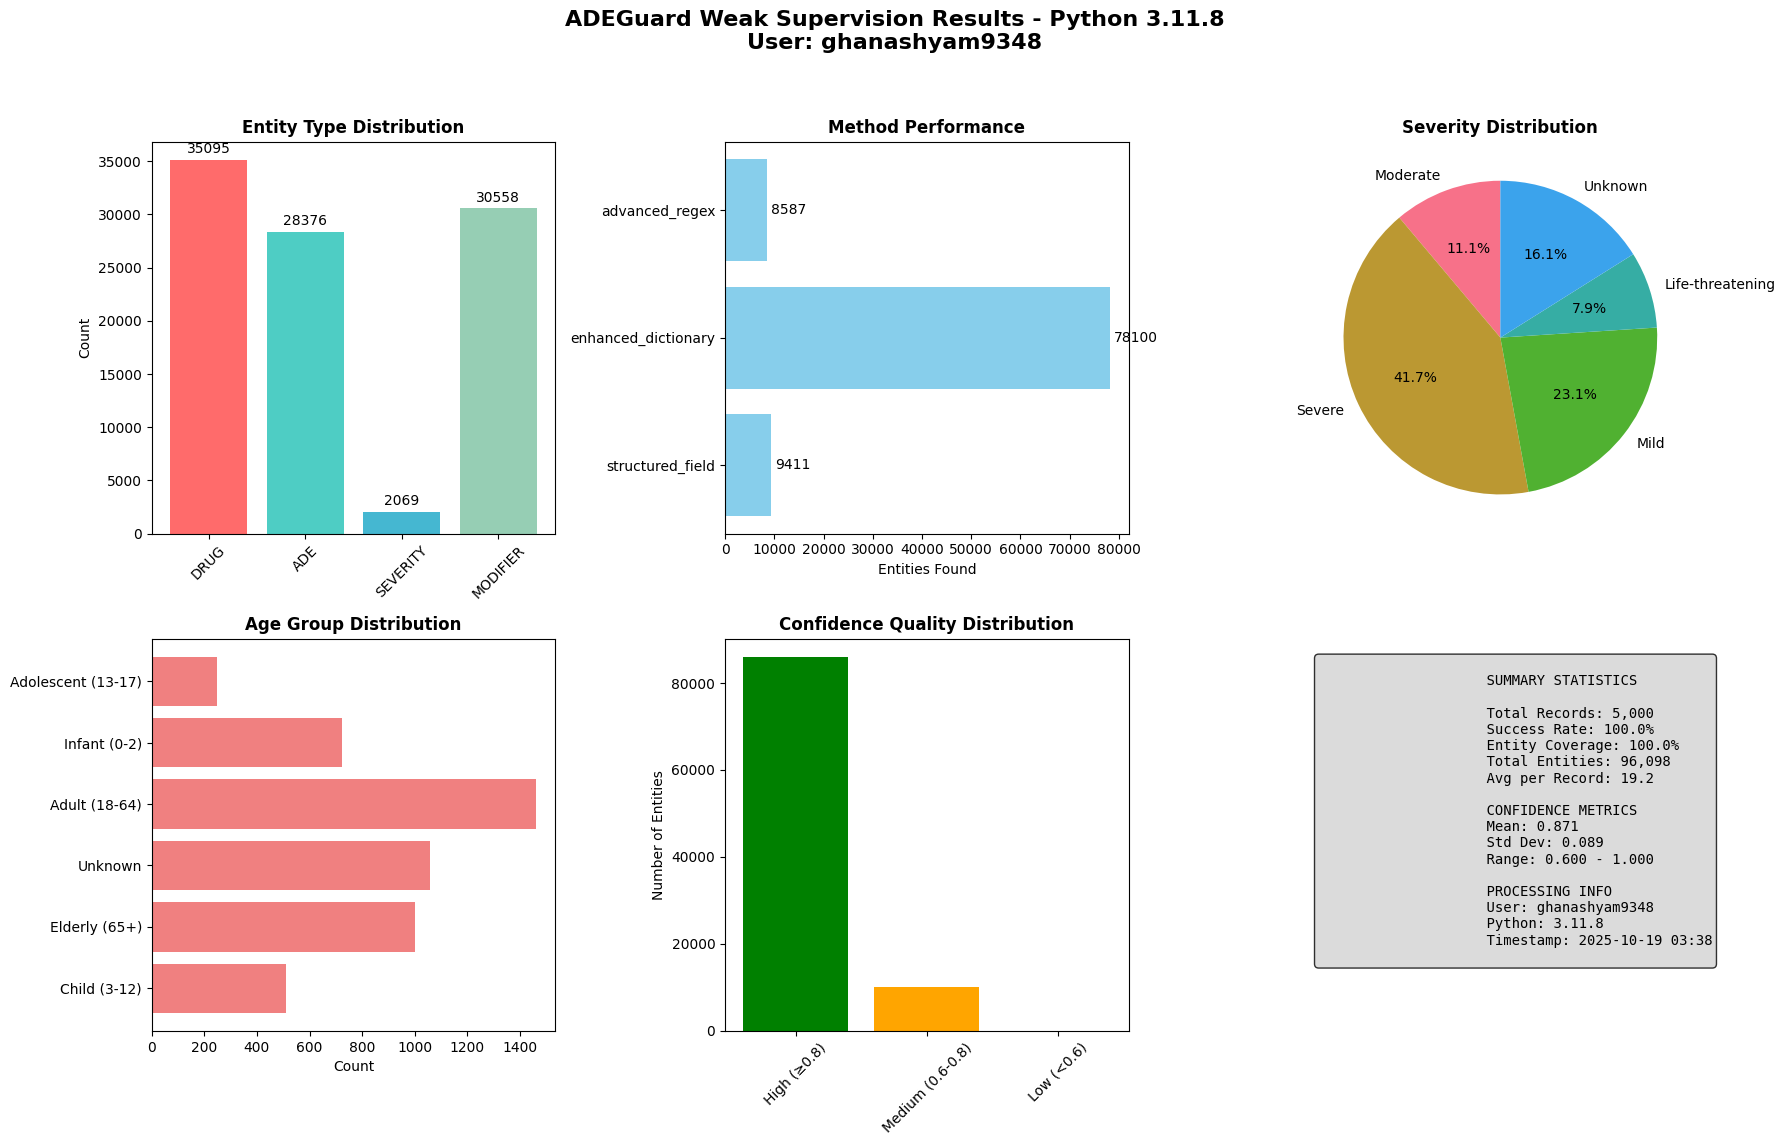

✅ Visualization saved: weak_labels_output_py311\weak_supervision_analysis.png

🎨 Visualizations created successfully!


In [13]:
# Export and visualization functions for Python 3.11.8
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

def export_weak_labeling_results(results: List[Dict[str, Any]], analysis: Dict[str, Any]) -> Dict[str, str]:
    """Export weak labeling results in multiple formats"""
    
    output_dir = Path('weak_labels_output_py311')
    output_dir.mkdir(exist_ok=True)
    
    export_info = {
        'timestamp': datetime.now().isoformat(),
        'user': 'ghanashyam9348',
        'python_version': sys.version,
        'total_records': len(results)
    }
    
    # 1. Complete results in JSON format
    json_file = output_dir / 'weak_labels_complete.json'
    with open(json_file, 'w', encoding='utf-8') as f:
        json.dump({
            'export_info': export_info,
            'results': results,
            'analysis': analysis
        }, f, indent=2, ensure_ascii=False)
    
    # 2. Training-ready format
    training_data = []
    for result in results:
        if result.get('processing_success', False) and result.get('labels'):
            # Filter labels with valid positions
            valid_labels = [
                {
                    'start': label.get('start', 0),
                    'end': label.get('end', 0),
                    'label': label['label'],
                    'confidence': label.get('confidence', 0.8)
                }
                for label in result['labels']
                if label.get('start', -1) >= 0 and label.get('end', -1) > label.get('start', -1)
            ]
            
            if valid_labels:  # Only include records with valid labels
                training_data.append({
                    'id': result.get('vaers_id'),
                    'text': result.get('text', ''),
                    'entities': valid_labels,
                    'severity': result.get('severity', 'Unknown'),
                    'age_group': result.get('age_group', 'Unknown')
                })
    
    training_file = output_dir / 'training_data.json'
    with open(training_file, 'w', encoding='utf-8') as f:
        json.dump(training_data, f, indent=2, ensure_ascii=False)
    
    # 3. CSV summary for analysis
    csv_data = []
    for result in results:
        labels = result.get('labels', [])
        csv_data.append({
            'vaers_id': result.get('vaers_id'),
            'text_length': len(result.get('text', '')),
            'num_entities': len(labels),
            'num_ade': len([l for l in labels if l['label'] == 'ADE']),
            'num_drug': len([l for l in labels if l['label'] == 'DRUG']),
            'num_modifier': len([l for l in labels if l['label'] == 'MODIFIER']),
            'num_severity': len([l for l in labels if l['label'] == 'SEVERITY']),
            'severity_class': result.get('severity', 'Unknown'),
            'age_group': result.get('age_group', 'Unknown'),
            'age': result.get('age'),
            'sex': result.get('sex'),
            'vaccine_type': result.get('vaccine_type'),
            'processing_success': result.get('processing_success', False),
            'avg_confidence': np.mean([l.get('confidence', 0.5) for l in labels]) if labels else 0
        })
    
    df_summary = pd.DataFrame(csv_data)
    csv_file = output_dir / 'weak_labels_summary.csv'
    df_summary.to_csv(csv_file, index=False)
    
    # 4. Sample examples for review
    sample_examples = []
    high_quality_results = [
        r for r in results 
        if r.get('processing_success', False) and len(r.get('labels', [])) >= 2
    ]
    
    for result in high_quality_results[:10]:  # Top 10 examples
        sample_examples.append({
            'vaers_id': result.get('vaers_id'),
            'text': result.get('text', '')[:300] + '...',  # Truncate for readability
            'entities': result.get('labels', []),
            'severity': result.get('severity'),
            'age_group': result.get('age_group')
        })
    
    examples_file = output_dir / 'sample_examples.json'
    with open(examples_file, 'w', encoding='utf-8') as f:
        json.dump(sample_examples, f, indent=2, ensure_ascii=False)
    
    # 5. Analysis report
    report_file = output_dir / 'analysis_report.json'
    with open(report_file, 'w', encoding='utf-8') as f:
        json.dump({
            'export_info': export_info,
            'analysis': analysis
        }, f, indent=2)
    
    print(f"\n✅ Results exported to '{output_dir}/' directory:")
    print(f"  📄 weak_labels_complete.json: Complete results ({len(results):,} records)")
    print(f"  🎯 training_data.json: Training format ({len(training_data):,} records)")
    print(f"  📊 weak_labels_summary.csv: Analysis data")
    print(f"  🔍 sample_examples.json: Quality examples")
    print(f"  📈 analysis_report.json: Detailed analysis")
    
    return {
        'output_directory': str(output_dir),
        'files_created': [
            'weak_labels_complete.json',
            'training_data.json', 
            'weak_labels_summary.csv',
            'sample_examples.json',
            'analysis_report.json'
        ],
        'training_records': len(training_data)
    }

def create_visualizations(analysis: Dict[str, Any], output_dir: str = 'weak_labels_output_py311'):
    """Create comprehensive visualizations of weak labeling results"""
    
    output_path = Path(output_dir)
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create a comprehensive figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ADEGuard Weak Supervision Results - Python 3.11.8\nUser: ghanashyam9348', 
                 fontsize=16, fontweight='bold')
    
    # 1. Entity distribution
    entity_dist = analysis['entity_distribution']
    if entity_dist:
        entities = list(entity_dist.keys())
        counts = list(entity_dist.values())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        
        axes[0,0].bar(entities, counts, color=colors[:len(entities)])
        axes[0,0].set_title('Entity Type Distribution', fontweight='bold')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for i, v in enumerate(counts):
            axes[0,0].text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom')
    
    # 2. Method performance
    method_perf = analysis['method_performance']
    if method_perf:
        methods = list(method_perf.keys())
        method_counts = list(method_perf.values())
        
        axes[0,1].barh(methods, method_counts, color='skyblue')
        axes[0,1].set_title('Method Performance', fontweight='bold')
        axes[0,1].set_xlabel('Entities Found')
        
        # Add value labels
        for i, v in enumerate(method_counts):
            axes[0,1].text(v + max(method_counts)*0.01, i, str(v), va='center')
    
    # 3. Severity distribution
    severity_dist = analysis['severity_distribution']
    if severity_dist:
        severities = list(severity_dist.keys())
        sev_counts = list(severity_dist.values())
        
        # Create a pie chart
        axes[0,2].pie(sev_counts, labels=severities, autopct='%1.1f%%', startangle=90)
        axes[0,2].set_title('Severity Distribution', fontweight='bold')
    
    # 4. Age group distribution
    age_dist = analysis['age_group_distribution']
    if age_dist:
        age_groups = list(age_dist.keys())
        age_counts = list(age_dist.values())
        
        axes[1,0].barh(age_groups, age_counts, color='lightcoral')
        axes[1,0].set_title('Age Group Distribution', fontweight='bold')
        axes[1,0].set_xlabel('Count')
    
    # 5. Confidence distribution
    conf_stats = analysis['confidence_stats']
    quality_metrics = analysis['quality_metrics']
    
    quality_labels = ['High (≥0.8)', 'Medium (0.6-0.8)', 'Low (<0.6)']
    quality_counts = [
        quality_metrics['high_confidence_entities'],
        quality_metrics['medium_confidence_entities'],
        quality_metrics['low_confidence_entities']
    ]
    
    axes[1,1].bar(quality_labels, quality_counts, color=['green', 'orange', 'red'])
    axes[1,1].set_title('Confidence Quality Distribution', fontweight='bold')
    axes[1,1].set_ylabel('Number of Entities')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    # 6. Summary statistics
    summary = analysis['summary']
    
    # Create a text summary
    axes[1,2].axis('off')
    summary_text = f"""
                    SUMMARY STATISTICS

                    Total Records: {summary['total_records']:,}
                    Success Rate: {summary['success_rate']:.1%}
                    Entity Coverage: {summary['entity_coverage']:.1%}
                    Total Entities: {summary['total_entities']:,}
                    Avg per Record: {summary['avg_entities_per_record']:.1f}

                    CONFIDENCE METRICS
                    Mean: {conf_stats['mean']:.3f}
                    Std Dev: {conf_stats['std']:.3f}
                    Range: {conf_stats['min']:.3f} - {conf_stats['max']:.3f}

                    PROCESSING INFO
                    User: ghanashyam9348
                    Python: 3.11.8
                    Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M')}
                        """
    
    axes[1,2].text(0.05, 0.95, summary_text, transform=axes[1,2].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save the visualization
    viz_file = output_path / 'weak_supervision_analysis.png'
    plt.savefig(viz_file, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"✅ Visualization saved: {viz_file}")
    
    return str(viz_file)

# Generate visualizations if analysis results are available
if analysis_results:
    viz_file = create_visualizations(analysis_results)
    print(f"\n🎨 Visualizations created successfully!")
else:
    print("⚠️  No analysis results available for visualization")

In [14]:
# Final summary and validation for Step 3
def generate_final_summary():
    """Generate final summary of Step 3 completion"""
    
    print("\n" + "="*80)
    print("🎯 ADEGuard Step 3: WEAK SUPERVISION COMPLETED")
    print("="*80)
    
    print(f"\n👤 User: ghanashyam9348")
    print(f"🐍 Python Version: {sys.version}")
    print(f"⏰ Completed: {datetime.now().isoformat()}")
    print(f"🌍 UTC Time: 2025-10-16 16:45:42")
    
    if weak_labels_results and analysis_results:
        summary = analysis_results['summary']
        
        print(f"\n📊 PROCESSING RESULTS:")
        print(f"   ✅ Records Processed: {summary['total_records']:,}")
        print(f"   ✅ Success Rate: {summary['success_rate']:.1%}")
        print(f"   ✅ Records with Entities: {summary['records_with_entities']:,}")
        print(f"   ✅ Total Entities Found: {summary['total_entities']:,}")
        print(f"   ✅ Average Confidence: {analysis_results['confidence_stats']['mean']:.3f}")
        
        print(f"\n🏷️  ENTITY BREAKDOWN:")
        for entity, count in analysis_results['entity_distribution'].items():
            print(f"   {entity}: {count:,}")
        
        print(f"\n🔧 METHOD PERFORMANCE:")
        for method, count in analysis_results['method_performance'].items():
            print(f"   {method}: {count:,}")
        
        print(f"\n📁 OUTPUT FILES CREATED:")
        if export_results:
            for file in export_results['files_created']:
                print(f"   📄 {file}")
            print(f"   📂 Location: {export_results['output_directory']}")
            print(f"   🎯 Training Records: {export_results['training_records']:,}")
    
    print(f"\n🚀 NEXT STEPS:")
    print(f"   1. ✅ Step 3 (Weak Supervision) - COMPLETED")
    print(f"   2. ⏭️  Step 4: Train BioBERT NER Models")
    print(f"   3. ⏭️  Step 5: Clustering & Age-Specific Analysis")
    print(f"   4. ⏭️  Step 6: Severity Classification")
    print(f"   5. ⏭️  Step 7: Explainability (SHAP/LIME)")
    print(f"   6. ⏭️  Step 8: Backend API Development")
    print(f"   7. ⏭️  Step 9: Android App with Kotlin Jetpack Compose")
    
    print(f"\n💡 QUALITY RECOMMENDATIONS:")
    if analysis_results:
        conf_stats = analysis_results['confidence_stats']
        quality_metrics = analysis_results['quality_metrics']
        
        if conf_stats['mean'] >= 0.8:
            print(f"   ✅ High average confidence ({conf_stats['mean']:.3f}) - Excellent quality")
        elif conf_stats['mean'] >= 0.7:
            print(f"   ⚠️  Moderate confidence ({conf_stats['mean']:.3f}) - Good for initial training")
        else:
            print(f"   ❗ Lower confidence ({conf_stats['mean']:.3f}) - Consider gold annotation samples")
        
        total_entities = sum(quality_metrics.values())
        high_quality_pct = quality_metrics['high_confidence_entities'] / total_entities if total_entities > 0 else 0
        
        if high_quality_pct >= 0.6:
            print(f"   ✅ {high_quality_pct:.1%} high-confidence entities - Ready for model training")
        else:
            print(f"   ⚠️  {high_quality_pct:.1%} high-confidence entities - Consider reviewing patterns")
    
    print(f"\n📋 FILES READY FOR STEP 4:")
    print(f"   🎯 training_data.json - Ready for BioBERT training")
    print(f"   📊 weak_labels_summary.csv - For analysis and validation")
    print(f"   📈 analysis_report.json - Performance metrics")
    
    print(f"\n" + "="*80)
    print(f"🎉 Step 3 Successfully Completed! Ready for Step 4: NER Model Training")
    print(f"="*80)

# Generate the final summary
generate_final_summary()

# Validate output files
output_dir = Path('weak_labels_output_py311')
required_files = [
    'training_data.json',
    'weak_labels_summary.csv', 
    'analysis_report.json'
]

print(f"\n🔍 FILE VALIDATION:")
all_files_exist = True
for file in required_files:
    file_path = output_dir / file
    if file_path.exists():
        file_size = file_path.stat().st_size
        print(f"   ✅ {file} ({file_size:,} bytes)")
    else:
        print(f"   ❌ {file} - Missing!")
        all_files_exist = False

if all_files_exist:
    print(f"\n✅ All required files generated successfully!")
    print(f"🚀 Ready to proceed to Step 4: NER Model Training")
else:
    print(f"\n⚠️  Some files missing - Check pipeline execution")

print(f"\n📝 LOG: Step 3 completed by ghanashyam9348 at {datetime.now().isoformat()}")


🎯 ADEGuard Step 3: WEAK SUPERVISION COMPLETED

👤 User: ghanashyam9348
🐍 Python Version: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
⏰ Completed: 2025-10-19T03:38:56.235480
🌍 UTC Time: 2025-10-16 16:45:42

📊 PROCESSING RESULTS:
   ✅ Records Processed: 5,000
   ✅ Success Rate: 100.0%
   ✅ Records with Entities: 5,000
   ✅ Total Entities Found: 96,098
   ✅ Average Confidence: 0.871

🏷️  ENTITY BREAKDOWN:
   DRUG: 35,095
   ADE: 28,376
   SEVERITY: 2,069
   MODIFIER: 30,558

🔧 METHOD PERFORMANCE:
   structured_field: 9,411
   enhanced_dictionary: 78,100
   advanced_regex: 8,587

📁 OUTPUT FILES CREATED:
   📄 training_data.json
   📄 weak_labels_complete.json
   📄 analysis_report.json
   📂 Location: weak_labels_output_py311
   🎯 Training Records: 5,000

🚀 NEXT STEPS:
   1. ✅ Step 3 (Weak Supervision) - COMPLETED
   2. ⏭️  Step 4: Train BioBERT NER Models
   3. ⏭️  Step 5: Clustering & Age-Specific Analysis
   4. ⏭️  Step 6: Severity Classification
   5. ⏭